In [3]:
import pandas as pd 
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
df = pd.read_csv(r"C:\Users\abirf\OneDrive\Desktop\fake_job_postings.csv")

In [7]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [9]:
df.shape

(17880, 18)

In [11]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [13]:
df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [15]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [17]:
df.dropna(subset=['description'])

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [19]:
df = df[['description', 'fraudulent']]

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abirf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stop_words = set(stopwords.words('english'))

In [25]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s', ' ', text)
    tokens = [word for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

df['clean_desc'] = df['description'].apply(clean_text)

In [26]:
df.head()

,description,fraudulent,clean_desc
0,"Food52, a fast-growing, James Beard Award-winn...",0,food52 fast growing james beard award winning ...
1,Organised - Focused - Vibrant - Awesome!Do you...,0,organised focused vibrant awesome passion cust...
2,"Our client, located in Houston, is actively se...",0,client located houston actively seeking experi...
3,THE COMPANY: ESRI – Environmental Systems Rese...,0,company esri environmental systems research in...
4,JOB TITLE: Itemization Review ManagerLOCATION:...,0,job title itemization review managerlocation f...


In [29]:
x= df['clean_desc']
y= df['fraudulent']

In [31]:
tfidf = TfidfVectorizer(max_features = 1000)
x_vec = tfidf.fit_transform(x)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_vec, y, test_size = 0.2, random_state = 42)

In [35]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression()

In [39]:
model.fit(x_train, y_train)

LogisticRegression()

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [43]:
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.964765100671141
[[3394    1]
 [ 125   56]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3395
           1       0.98      0.31      0.47       181

    accuracy                           0.96      3576
   macro avg       0.97      0.65      0.73      3576
weighted avg       0.97      0.96      0.96      3576



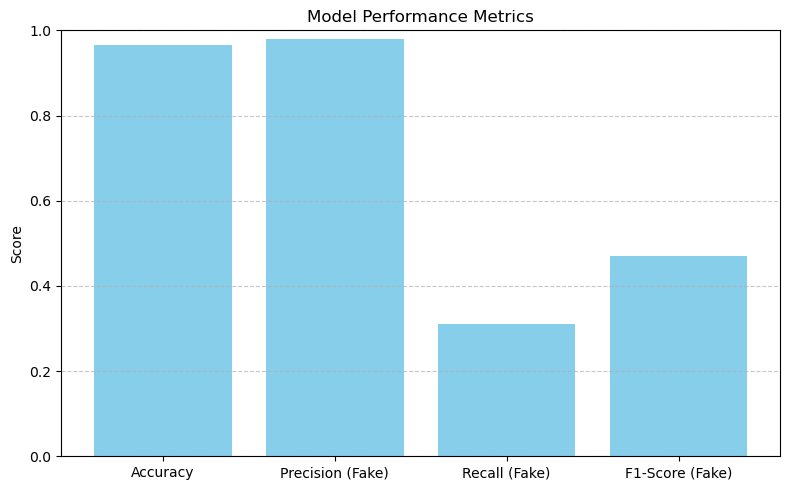

In [45]:
import matplotlib.pyplot as plt

# Sample metric values
metrics = {
    'Accuracy': 0.9648,
    'Precision (Fake)': 0.98,
    'Recall (Fake)': 0.31,
    'F1-Score (Fake)': 0.47
}

# Plot
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

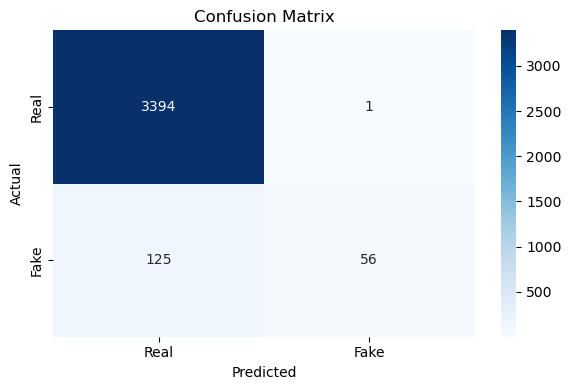

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Your confusion matrix values
cm = [[3394, 1],
      [125, 56]]

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [49]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression(class_weight = 'balanced')
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [53]:
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8956935123042505
[[3067  328]
 [  45  136]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3395
           1       0.29      0.75      0.42       181

    accuracy                           0.90      3576
   macro avg       0.64      0.83      0.68      3576
weighted avg       0.95      0.90      0.92      3576



In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [57]:
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

LogisticRegression()

In [59]:
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9057606263982103
[[3103  292]
 [  45  136]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3395
           1       0.32      0.75      0.45       181

    accuracy                           0.91      3576
   macro avg       0.65      0.83      0.70      3576
weighted avg       0.95      0.91      0.92      3576



In [61]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

In [63]:
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

LogisticRegression()

In [65]:
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8243847874720358
[[2802  593]
 [  35  146]]
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      3395
           1       0.20      0.81      0.32       181

    accuracy                           0.82      3576
   macro avg       0.59      0.82      0.61      3576
weighted avg       0.95      0.82      0.87      3576

